# Проект 1 Анализ рынка видео игр

Для анализа был предоставлены данны о продажах игр, оценки пользователей и экспертов, жанры и платформы с 1980 по 2016.Необходимо провести исследование для магазина видеогр, чтобы понять на основе исторических данных, какие игры более успешные и какие есть закономерности.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('/games.csv')

# 1.Сбор инфомации о датасете

In [8]:
display(data.head(5))
display(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

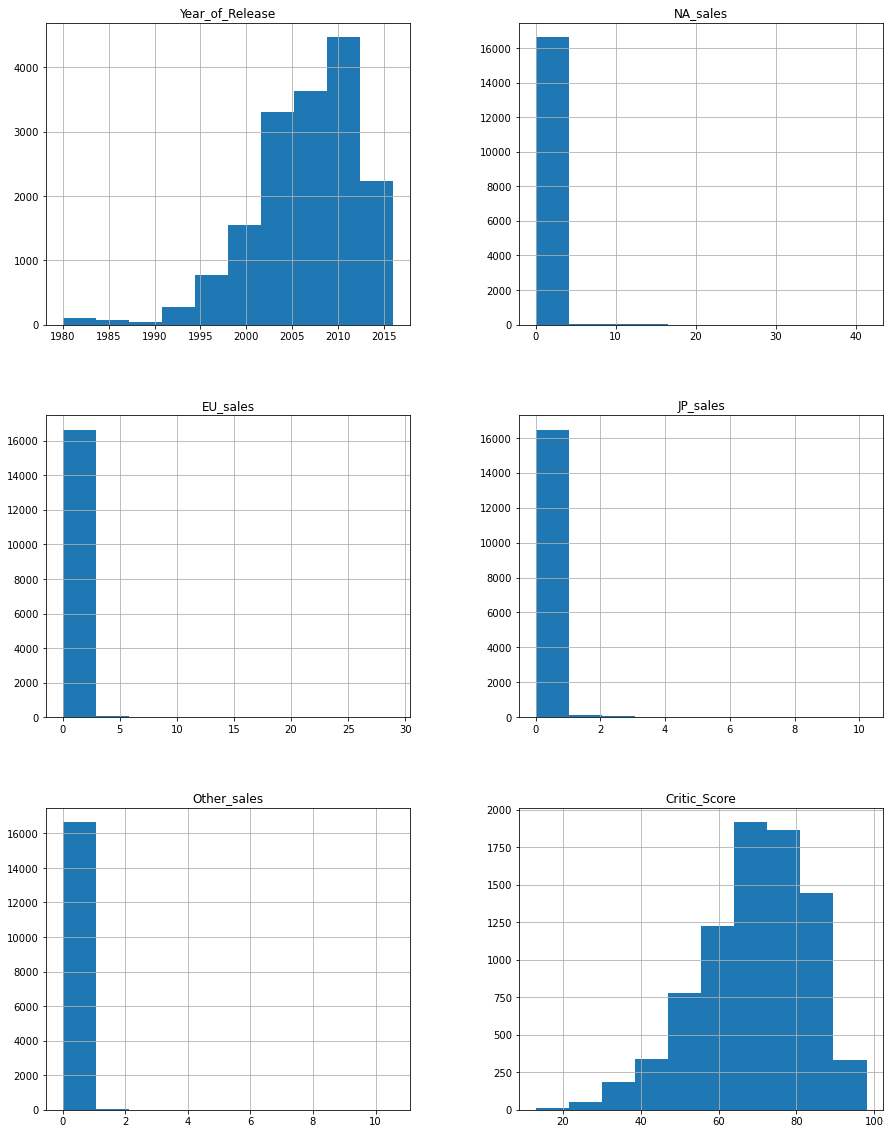

In [9]:
#Построение гистограмм по всем числовым столбцам
data.hist(figsize=(15, 20));

Проверка данных на явные дубликаты:

In [10]:
data.duplicated().sum()

0

# 2.Подготовка данных

In [11]:
#Приведем все столбцы к нижнему регистру
data.columns = [x.lower() for x in data.columns] 
#data.columns = data.columns.str.lower() альтернатива

## Обработка пропусков

In [13]:
#Определите, в каких столбцах есть пропуски
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Создадим функию, которая визуализирует пропуски по всему датасету

In [25]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'bar', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски по столбцам' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

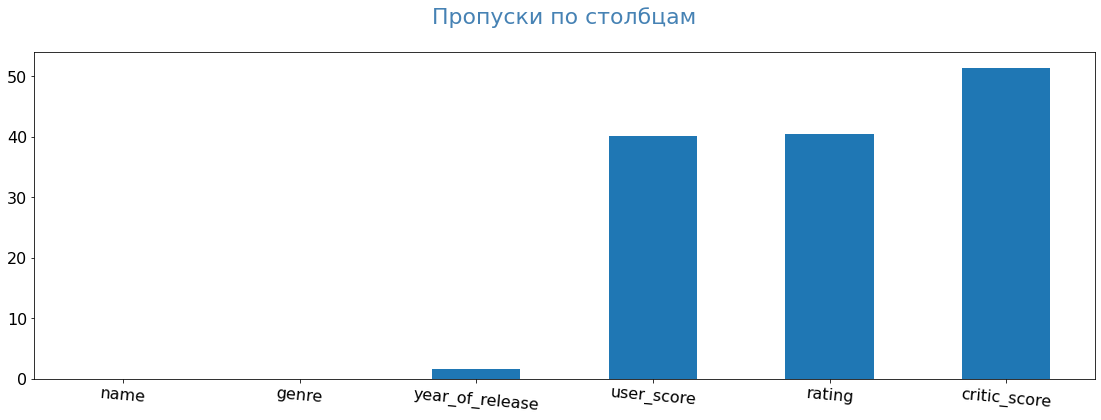

In [26]:
pass_value_barh(data)

### Name

In [27]:
data['name'].isna().sum() #кол-во пропусков

2

Удалим строки,где встречаются пропуски в столбце Name, т.к корректно заменить пропуск нельзя, а кол-во пропусков мало.

In [28]:
data = data.dropna(subset=['name'])

Причина пропуска: Скорее всего это могла быть ошибка системы или человеческий фактор

### year_of_release

In [30]:
na = data['year_of_release'].isna().sum() #кол-во пропусков
al = data['year_of_release'].count()

In [31]:
print('кол-во пропусков', na)
print('Отношение пропусков ко всем данным', round(na/al, 2))

кол-во пропусков 269
Отношение пропусков ко всем данным 0.02


Пропуски занимают всего 2% из всех данных, поэтому оптимальным решением будет удалить строки с пропусками в этом столбце.

In [32]:
data = data.dropna(subset=['year_of_release'])

Причина пропуска: помимо системных ошибок, также вполне вероятна проблема старых игр, в которых не везде есть инфомация о выходе игры, также вероятен вариант, когда игра в бете много времени из-за этого не очивидно какой год ставить - выхода в бете или когда вышла полная версия

### user_score

In [35]:
data['user_score'].isna().sum() #кол-во пропусков

6605

Подробнее изучим данный столбец

In [36]:
data['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Помимо NaN и числовых значений, встречается еще tbd, что означает To Be Decided (будет решено позже).
Для начала заменим tbd на NaN

In [37]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [38]:
data['user_score'].isna().sum()

8981

Пропуски в оценках пользователей, критиков и рейтинге оставим, т.к они могут исходить из той логики, что не все игры достойны оценки

## Замена типов данных

In [39]:
data["year_of_release"] = data["year_of_release"].astype('int')
data["user_score"] = data["user_score"].astype('float')

В годе релиза изменим с плавающей точкой на целочисленные значения.
А т.к мы заменили tbd на nan, User_score можем заменить на числа с плавающей точкой.

## Глобальные продажи

Добавим столбец для глобальных продаж

In [41]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# 3.Исследовательский анализ данных

### Выпус игр по годам

In [42]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

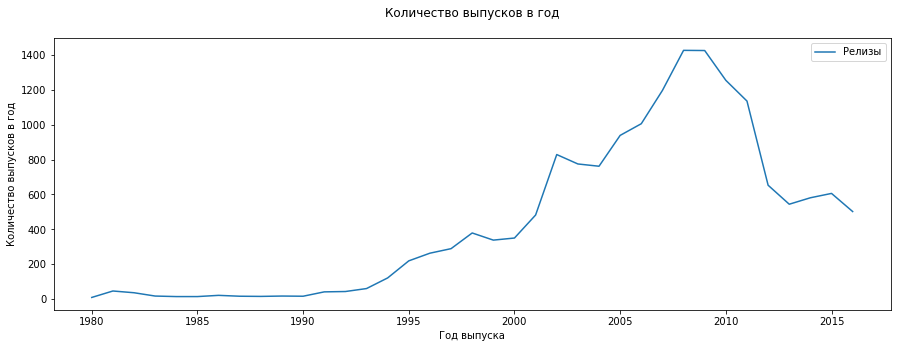

In [43]:
plt.figure(figsize=(15,5))
plt.plot(data.groupby('year_of_release')['name'].count(), label='Релизы')
plt.legend()
plt.title('Количество выпусков в год\n')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпусков в год')
plt.show()

До 1994 кол-во выпущенных игр в год не привышало 100, начиная с 1994 года выпуск игр сильно увеличивается с каждым годом в максимуме в 2008-2009 годах, когда кол-во выпущенных игр было больше 1400. Это можно свзязать с постепенным удешевлением персональных компютеров и распространением электроники по всему миру.

т.к кол-во релизов до 1994 года небольшое, а прошло много времени эти данные можно считать устаревшими и не использовать в дальнейшем анализе

### Продажи по платформам

In [44]:
platform_data = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).reset_index().head(10)

Топ 10 платформ по суммарным проажам

In [45]:
print(platform_data)

  platform  sum_sales
0      PS2    1233.56
1     X360     961.24
2      PS3     931.34
3      Wii     891.18
4       DS     802.78
5       PS     727.58
6      PS4     314.14
7      GBA     312.88
8      PSP     289.53
9      3DS     257.81


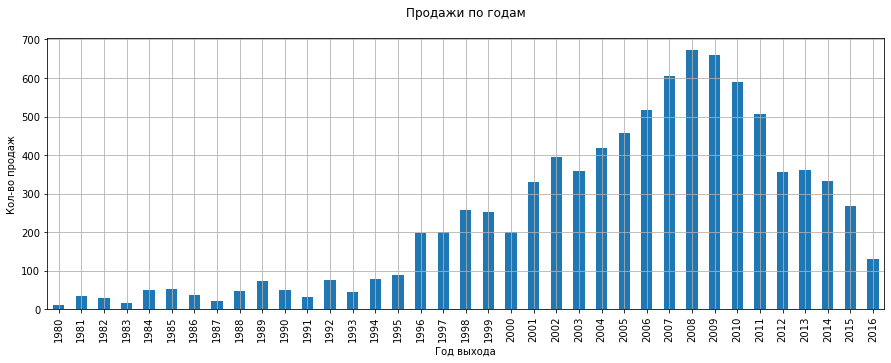

In [46]:
data.groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(15, 5))
plt.title('Продажи по годам\n  ')
plt.xlabel('Год выхода')
plt.ylabel('Кол-во продаж')
plt.grid(True)
plt.show();

In [47]:
top_platforms = platform_data['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [48]:
#Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
data_new_top = data.query('platform in @top_platforms')
data_new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


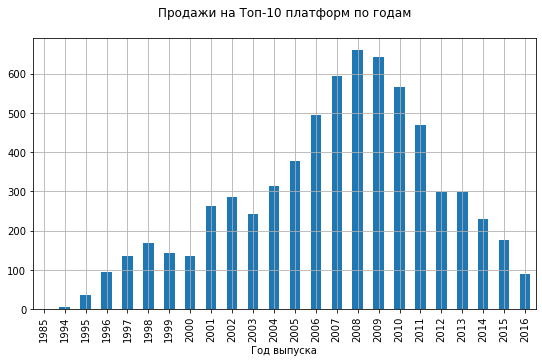

In [49]:
data_new_top.groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y='sum_sales', kind='bar', figsize=(9, 5))
plt.title('Продажи на Топ-10 платформ по годам\n  ')
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

На графике также видно, что до 1995 нет полноценных продаж среди топ 10 платформ, что подтверждает теорию о том, что данные до 95 года учитывать не стоит

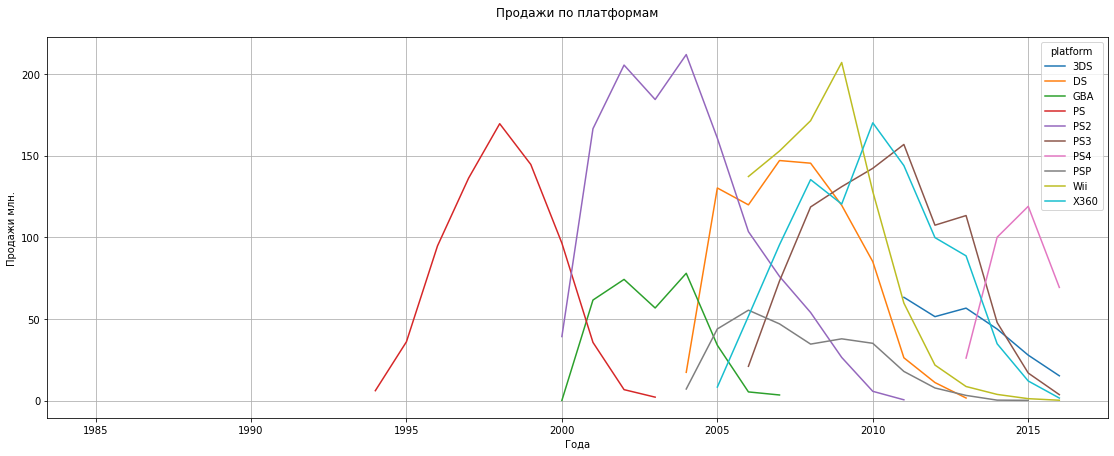

In [50]:
#Теперь построим распределение по годам для каждой из Топ10 платформ
#
pd.pivot_table(data_new_top , index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(19,7))
plt.grid(True)
plt.title('Продажи по платформам\n  ')
plt.xlabel('Года')
plt.ylabel('Продажи млн.')
plt.show()

In [51]:
#Сколько лет живут Топ10 платформ
data_n_top_years = data_new_top.groupby(['platform', 'year_of_release']).agg({'sum_sales':'sum'}).reset_index()
data_n_top_years['platform'].value_counts()

PSP     12
X360    12
PS2     12
DS      11
PS3     11
Wii     11
PS      10
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

Вывод: Продолжительность жизни платформы в среднем 11 лет.

### Определение актуального периода.

Т.к ср. продолжительность жизни платформы 11 лет, возьмем для анализа данные за период 2006-2017.
Для начала создадим сводную таблицу

In [52]:
data.query('year_of_release >= 2006').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,.,.,.,.,.,116,93,91,80,86,46
DC,.,1,1,.,.,.,.,.,.,.,.
DS,201,376,492,403,323,153,23,8,.,.,.
GBA,39,6,.,.,.,.,.,.,.,.,.
GC,40,4,.,.,.,.,.,.,.,.,.
PC,52,62,76,107,90,139,61,38,47,50,54
PS2,259,214,191,96,38,7,.,.,.,.,.
PS3,27,90,138,162,181,215,148,126,108,73,38
PS4,.,.,.,.,.,.,.,16,75,137,164


Из расспределения можно заметить, что 11 год переходный, что может сведетельствовать о переходе с старых версий на новые

### Найдем потенциально прибыльные платформы

Выберем несколько платформ, которые могут быть прибыльными

Для начала оптимальный вариант анализа - это последние три года, т.к сфера имеет быстрые скорости развития и изменения, данные, которым больше 2-3 лет уже не актуальны и могут ухудшить анализ 

In [54]:
data_actual_years = data[data['year_of_release'] >= 2014]
data_actual_years.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2014,2015,2016
platform,,,
3DS,80.0,86.0,46
PC,47.0,50.0,54
PS3,108.0,73.0,38
PS4,75.0,137.0,164
PSP,10.0,3.0,.
PSV,100.0,110.0,85
Wii,6.0,4.0,1
WiiU,31.0,28.0,14
X360,63.0,35.0,13


Отобразим на графике динамику продаж топ 10 платформ с учетом актуального периода

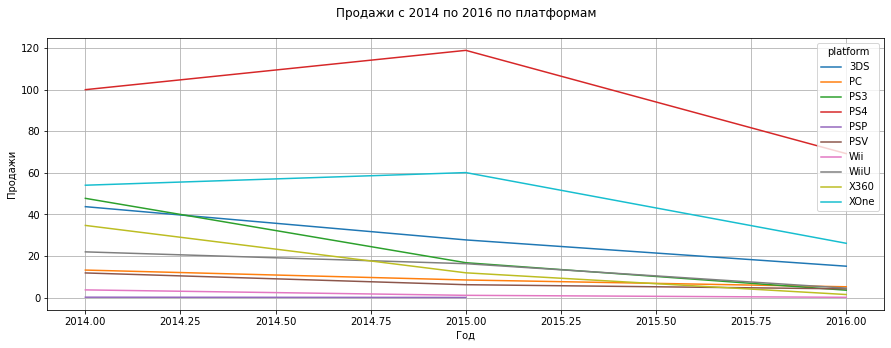

In [55]:
pd.pivot_table(data_actual_years, index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(15,5))
plt.grid(True)
plt.title('Продажи с 2014 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Из графика можно сделать вывод, что все платформы со временем теряют в продажах.
Из условий поставленной задачи - данные по 2016 году могут быть не полными, соответственно ориенитоваться на них не будем.
Шанс улучшить показатели продаж есть у PS4, PC, PSV, XOne и WiiU.
Лучшие перспективы у платформ PS4 и XOne.

In [56]:
# Для дальнейшего анализа добавим переменные для названий и продаж топ 5 перспективных платформ
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']
top5_platform = data_actual_years.query('platform in @top5_platform_name').groupby('platform')['sum_sales'].sum().sort_values(ascending=False).reset_index()

### Глобальные продажи игр по платформам

Построим график «ящик с усами» по глобальным продажам игр c разбивкой по платформам.

(0.0, 1.0)

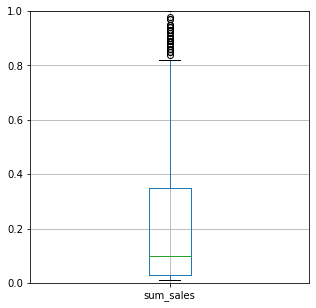

In [57]:
data_actual_years.boxplot('sum_sales', figsize=(5,5))
plt.ylim(0,1)

In [58]:
#Такеж посмотрим общую информацию
data_actual_years['sum_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: sum_sales, dtype: float64

In [61]:
data_actual_5 = data_actual_years.query('platform in @top5_platform_name')

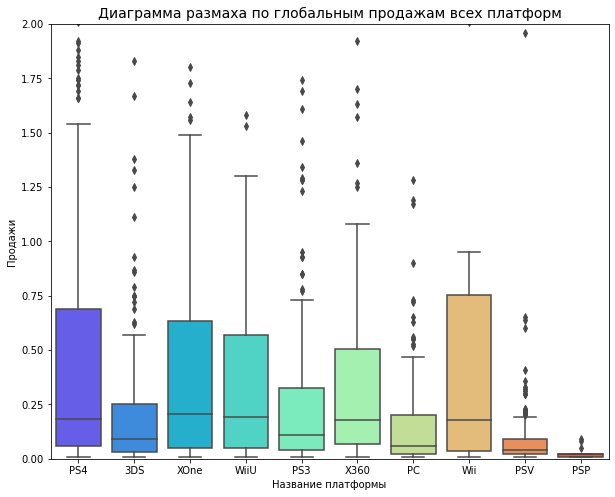

In [62]:
plt.figure(figsize=(10, 8))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="sum_sales", data = data_actual_years , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам всех платформ', fontsize=14)
plt.ylabel('Продажи')
plt.xlabel('Название платформы');

Добавим также диаграмму со всеми выбросами

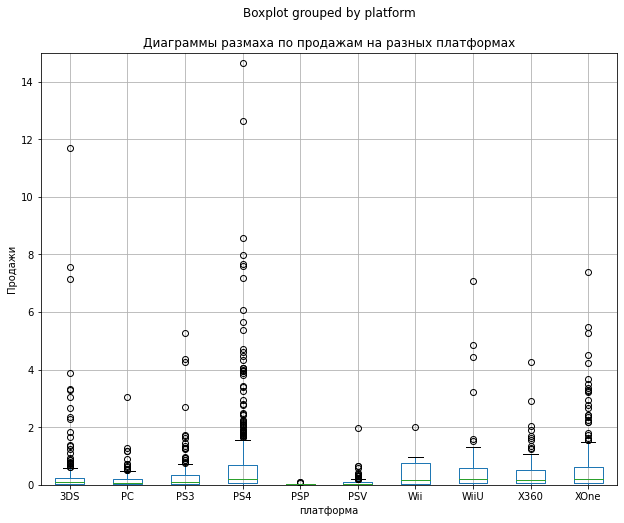

In [63]:
(data_actual_years[['sum_sales', 'platform']].boxplot(column='sum_sales', by='platform', figsize=(10,8))
)
plt.xlabel('платформа')
plt.ylabel('Продажи')
plt.title('Диаграммы размаха по продажам на разных платформах')
plt.ylim(0, 15)
plt.show()

Добавим сводную таблицу по глобальным продажам топ 5 платформ

In [64]:
data_actual_years_5 = data_actual_5.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum', fill_value='.')
data_actual_years_5['all_years'] = data_actual_years_5.sum(axis=1)
data_actual_years_5

year_of_release,2014,2015,2016,all_years
platform,,,,
3DS,43.76,27.78,15.14,86.68
PS4,100.00,118.90,69.25,288.15
PSV,11.90,6.25,4.25,22.40
WiiU,22.03,16.35,4.60,42.98
XOne,54.07,60.14,26.15,140.36


Вывод: выводы будут сделаны с расчетом, что данные за 2016 год не полные.
За последние 6 лет наибольшие продажи у ps4 c большим отрывом, затем идут на ровне 3ds и xOne. Стоит отметить высокие медианные значения глобальных продаж у PS4, Xone и WiiU, не смотря на низкие суммарные продажи за 6 лет. (в данный момент мы рассматриваем продажи в кол-ве копий, соответственно WiiU также может быть перспективной платформой. У PS4 и XOne видна хорошая, положительная тенденция увеличения продаж с каждым годом, тогда как 3DS, наоборот имеет отрицательную динаму, но за счет больших продаж в начальнве годы, она все равно вхлдит в топ 5 платформ за последние 6 лет

### Отзывы пользователей и критиков

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Т.к самая продоваемая платформа - PS4, на ее примере будем проводить анализ

In [65]:
filtered_PS4 = data_actual_years.query('platform == "PS4"')
filtered_PS4 = filtered_PS4[['critic_score', 'user_score', 'sum_sales']]
filtered_PS4.head()

,critic_score,user_score,sum_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


Далее будем искать зависимость продаж от оценок пользователей или критиков

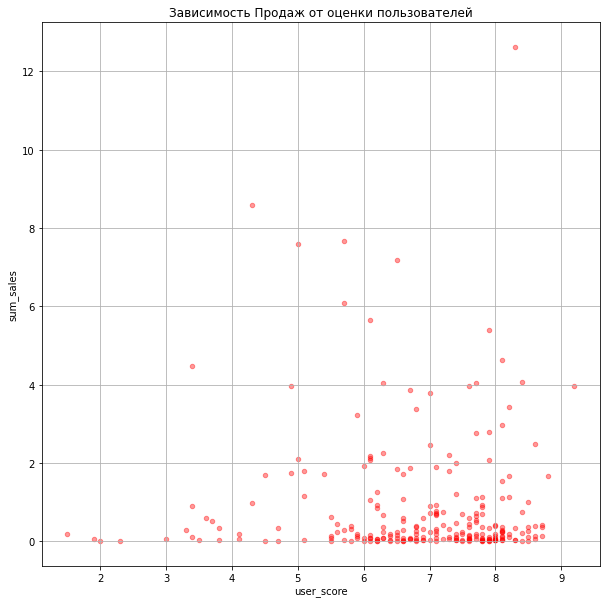

In [66]:
filtered_PS4.plot(kind='scatter', x='user_score', y='sum_sales', figsize=(10,10), color='r', alpha=0.4, grid=True)
plt.title('Зависимость Продаж от оценки пользователей');

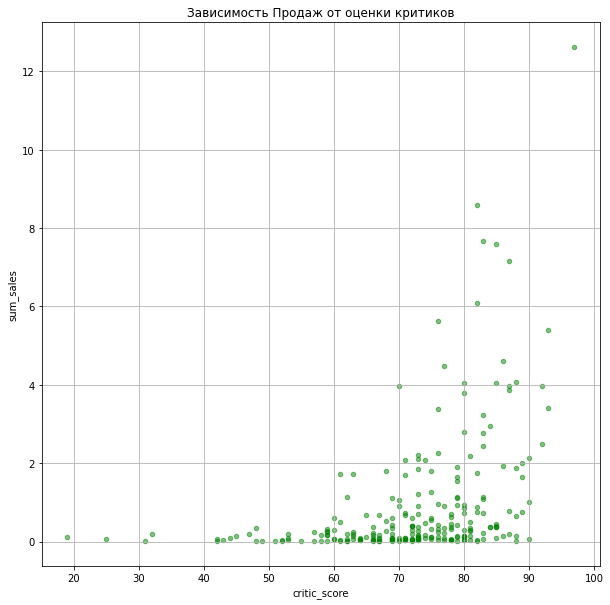

In [67]:
filtered_PS4.plot(kind='scatter', x='critic_score', y='sum_sales', figsize=(10,10), color='g', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков');

По графикам единственный вывод который можно сделать - слишком сильного влияния на продажи не оказывает ни одна из оценок

Найдем корреляцию для численных значений зависимости

In [70]:
filtered_PS4.corr().round(3)

,critic_score,user_score,sum_sales
critic_score,1.000,0.546,0.403
user_score,0.546,1.000,-0.040
sum_sales,0.403,-0.040,1.000


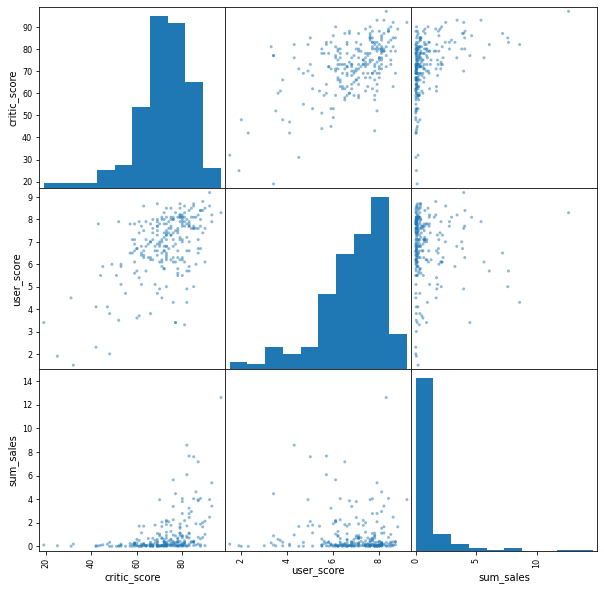

In [71]:
pd.plotting.scatter_matrix(filtered_PS4, figsize=(10,10), alpha=0.5);

Вывод: Есть положительная средняя корреляция (0.4) между оценкой критиков и продажами. Корреляция отсутствует между оценкой пользователей и продажами.
Но в то же время есть положительная средняя корреляция между оценкой критиков и пользователей. Это можно интерпритировать, как учитывание мнения критиков пользователями, так и наоборот

### Соотнесите выводы с продажами игр на других платформах.

Для начала проведем аналогичный анализ для оставшихся 4 платформ

In [72]:
data_actual_years.query('platform == "XOne"')[['critic_score', 'user_score', 'sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.44,0.43
user_score,0.44,1.00,-0.07
sum_sales,0.43,-0.07,1.00


In [73]:
data_actual_years.query('platform == "3DS"')[['critic_score', 'user_score', 'sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.86,0.31
user_score,0.86,1.00,0.22
sum_sales,0.31,0.22,1.00


In [74]:
data_actual_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.76,0.37
user_score,0.76,1.00,0.41
sum_sales,0.37,0.41,1.00


In [75]:
data_actual_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'sum_sales']].corr().round(2)

,critic_score,user_score,sum_sales
critic_score,1.00,0.76,0.37
user_score,0.76,1.00,0.41
sum_sales,0.37,0.41,1.00


Диаграммы размаха для каждой платформы

3DS


user_score    0.215193
sum_sales     1.000000
Name: sum_sales, dtype: float64

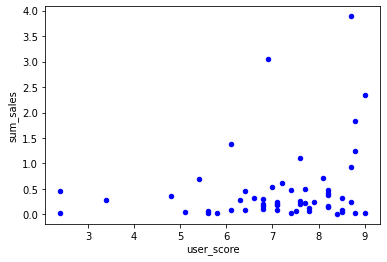

critic_score    0.314117
sum_sales       1.000000
Name: sum_sales, dtype: float64

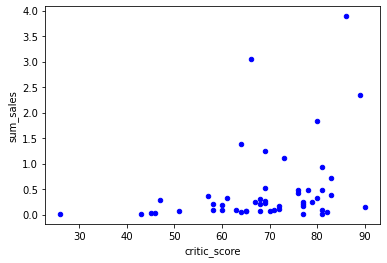

PC


user_score   -0.071597
sum_sales     1.000000
Name: sum_sales, dtype: float64

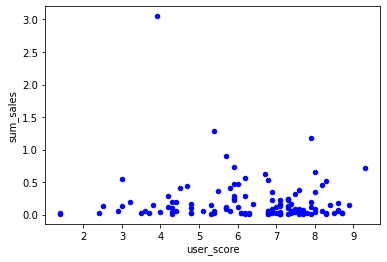

critic_score    0.174634
sum_sales       1.000000
Name: sum_sales, dtype: float64

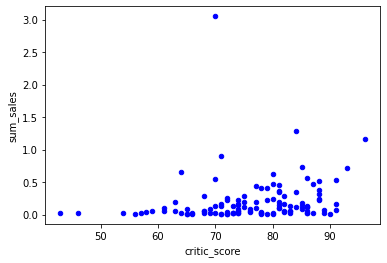

PS3


user_score   -0.166761
sum_sales     1.000000
Name: sum_sales, dtype: float64

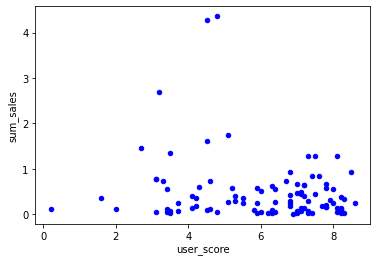

critic_score    0.446575
sum_sales       1.000000
Name: sum_sales, dtype: float64

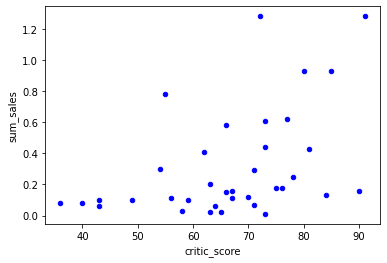

PS4


user_score   -0.040132
sum_sales     1.000000
Name: sum_sales, dtype: float64

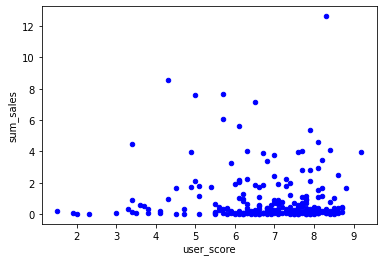

critic_score    0.402661
sum_sales       1.000000
Name: sum_sales, dtype: float64

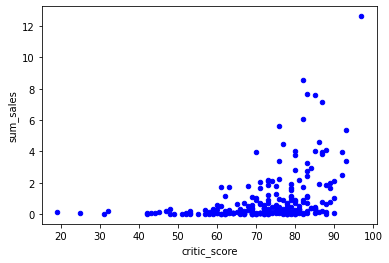

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score   -0.168455
sum_sales     1.000000
Name: sum_sales, dtype: float64

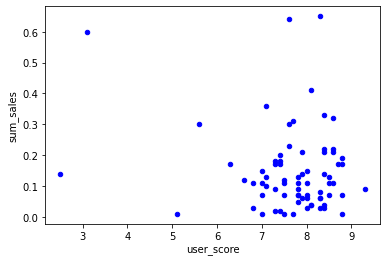

critic_score    0.042665
sum_sales       1.000000
Name: sum_sales, dtype: float64

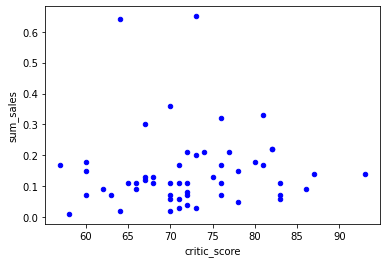

Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score    0.407926
sum_sales     1.000000
Name: sum_sales, dtype: float64

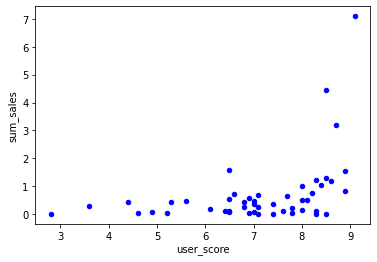

critic_score    0.370201
sum_sales       1.000000
Name: sum_sales, dtype: float64

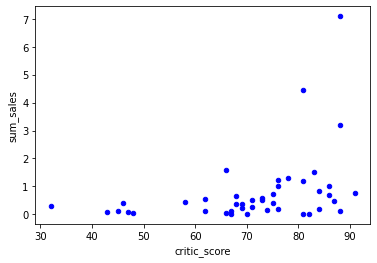

X360


user_score   -0.138445
sum_sales     1.000000
Name: sum_sales, dtype: float64

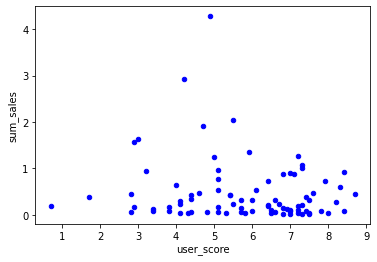

critic_score    0.525723
sum_sales       1.000000
Name: sum_sales, dtype: float64

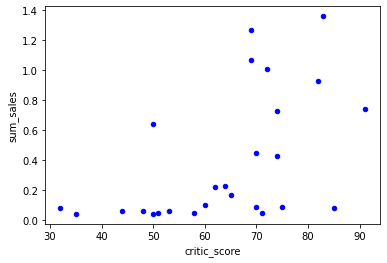

XOne


user_score   -0.070384
sum_sales     1.000000
Name: sum_sales, dtype: float64

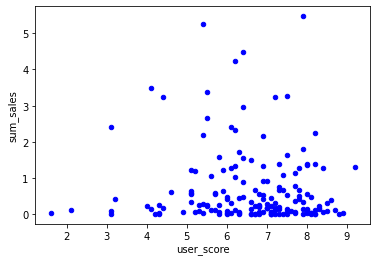

critic_score    0.428677
sum_sales       1.000000
Name: sum_sales, dtype: float64

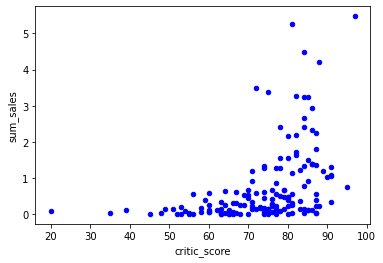

In [79]:
df_sc, y = data_actual_years, 'sum_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 10 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

Посмотрим на зависимость оценок на продажи для топ 5 плафтормах

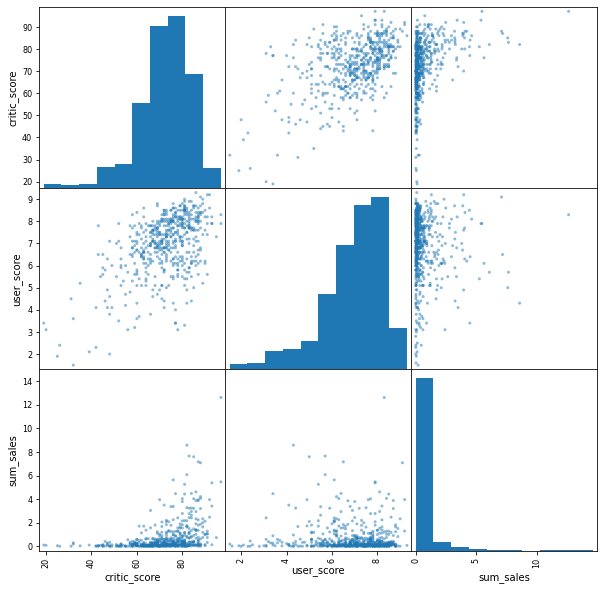

In [76]:
pd.plotting.scatter_matrix(data_actual_5[['critic_score', 'user_score', 'sum_sales']], figsize=(10,10), alpha=0.5);

Отдельно выведем диаграммы размаха для оценки пользователей и критиков

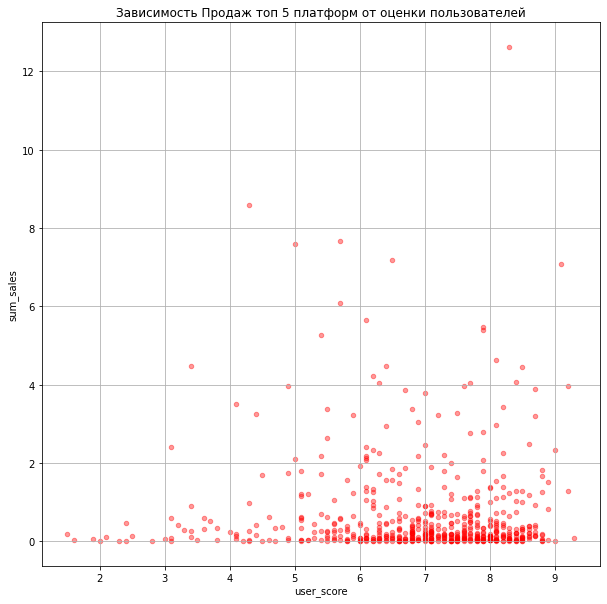

In [77]:
data_actual_5.plot(kind='scatter', x='user_score', y='sum_sales', figsize=(10,10), color='r', alpha=0.4, grid=True)
plt.title('Зависимость Продаж топ 5 платформ от оценки пользователей');

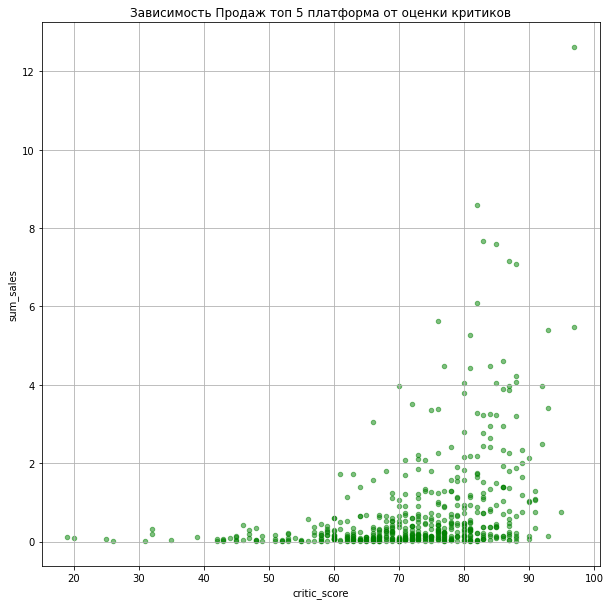

In [78]:
data_actual_5.plot(kind='scatter', x='critic_score', y='sum_sales', figsize=(10,10), color='g', alpha=0.5, grid=True)
plt.title('Зависимость Продаж топ 5 платформа от оценки критиков');

Вывод: У всех платформ кроме PS4 и XOne есть сильная положительная корреляция между оценкой критиков и продажами (>0.7). Соответственно лидеры рынка Xone и PS4 менее зависимы от мнения критиков, чем остальные платформы.
Только у одной платформы есть хотябы слабая положительная связь между оценкой пользователей и продажами - и это WiiU, это можно легко объяснить ее большой популярностью в прошлые годы и так называемой 'олдскульность', за счет чего могла появиться такая связь. Также благодоря графикам рассеивания по топ 5 платформам видно, что в графике с оценкой пользователей не видно какой-либо зависимости, о чем говорили и предидущие данные, а в графике с оценкой критиков, все же моно увидеть не сильную зависимость.

### Анализ распределение игр по жанрам.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для общей информации рассмотрим общее распределение игр по жанрам

In [81]:
data_actual_years['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Рассмотрим самые прибыльные жанры

In [82]:
data_genre = data_actual_years.groupby(['genre']).agg({'sum_sales':'sum', 'name':'count'})
data_genre = data_genre.rename(columns={'name':'count'})
data_genre.sort_values(by = 'sum_sales', ascending=False)

,sum_sales,count
genre,,
Action,199.36,619
Shooter,170.94,128
Sports,109.48,161
Role-Playing,101.44,221
Misc,37.55,113
Fighting,28.22,60
Racing,27.52,69
Platform,18.09,38
Adventure,17.55,185


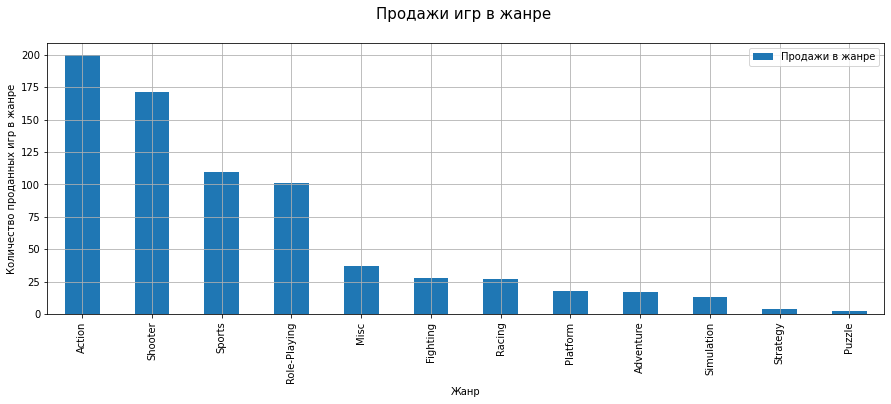

In [84]:
ax=data_genre[['sum_sales']].sort_values(by = 'sum_sales', ascending=False).plot(kind='bar', figsize=(15, 5))

plt.title('Продажи игр в жанре \n  ', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр в жанре')
plt.legend(['Продажи в жанре'])
plt.grid(True)
plt.show()

In [85]:
data_med = data_actual_years.groupby(['genre']).agg({'sum_sales':'median', 'name':'count'})
data_mde = data_genre.rename(columns={'name':'count'})
data_med.sort_values(by = 'sum_sales', ascending=False)

,sum_sales,name
genre,,
Shooter,0.515,128
Sports,0.180,161
Platform,0.140,38
Fighting,0.125,60
Role-Playing,0.110,221
Simulation,0.100,44
Action,0.090,619
Misc,0.090,113
Racing,0.090,69


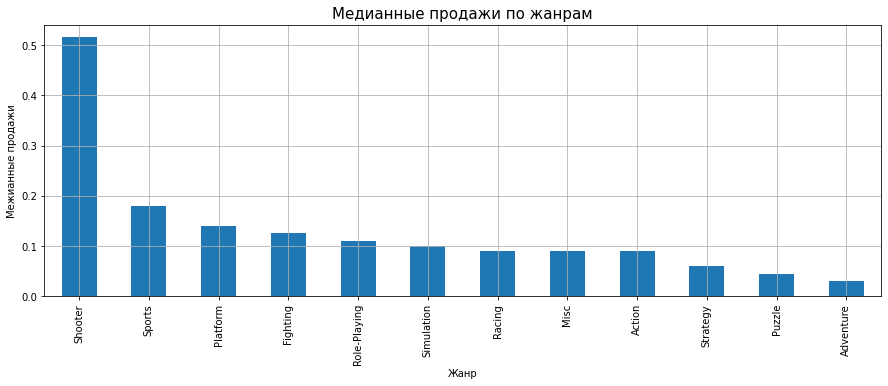

In [86]:
ax = data_med['sum_sales'].sort_values(ascending=False).plot(kind='bar', figsize= (15, 5))
                   
plt.title('Медианные продажи по жанрам', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Межианные продажи')
plt.grid(True)
plt.show()

Вывод:
~~~
Самые продоваемые жанры:
- Action
- Shooter
- Role-Playing
- Sports

Стоит также отметить, что Action занимает 1 место с отрывом от всех остальных, тогда как разница между топ 5 и топ 9 невелика.
Строгих выводов о прибыли сделать невозможно без дополнительных данных. Тем не менее если предпологать в среднем среднюю\сильную корреляцию между прибылью и продоваемостью, то можно предположить, что топ 1 всеже занимает Action, но не прибыльность очень сложно оценить, т.к разница в продоваемости жанров в 'низу' нашего топа мала.

Также важно заметить, что медианные продажи намного больше у шутер, что говорит о высокой стабильности жанра + дпнный жанр на 2 месте по общим продажам. Из чего можно сделать вывод:
    Шутер - самый прибыльный жанр
~~~

ОБЩИЕ ВЫВОДЫ:
    - Для прогноза на 2017 год используются данные за 2011-2016 года, т.к они имеют наибольшую актуальность 
    - Наиболее перспективные платформы - PS4, XOne и WiiU
    - На продажи PS4 и XOne слабо влияет мнение критиков, тогда как на остальные платформы их оценка имеет сильное влияние. WiiU единственная из платформ, которая имеет слабое положительное влияние от оценки пользователей.
    - Самые продоваемые жанры: Action, Shooter, Role_Playing. Точную оценку прибыльности без дополнитульных данных дать невозмоно.

## Составление портрета пользователя каждого региона

### Самые популярные платформы

In [88]:
data_actual_years[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,1689.000000,1689.000000,1689.000000
mean,0.168182,0.160261,0.055115
std,0.446134,0.466846,0.211513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.020000,0.020000,0.010000
75%,0.120000,0.120000,0.040000
max,6.030000,6.310000,3.180000


In [89]:
data_na = data_actual_years.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('Топ 5 платформ Северной Америки')
display(data_na)

data_eu = data_actual_years.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('Топ 5 платформ Европы')
display(data_eu)
 
data_jp = data_actual_years.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('Топ 5 платформ Японии')
display(data_jp)

Топ 5 платформ Северной Америки


,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


Топ 5 платформ Европы


,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


Топ5 платформ Японии


,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


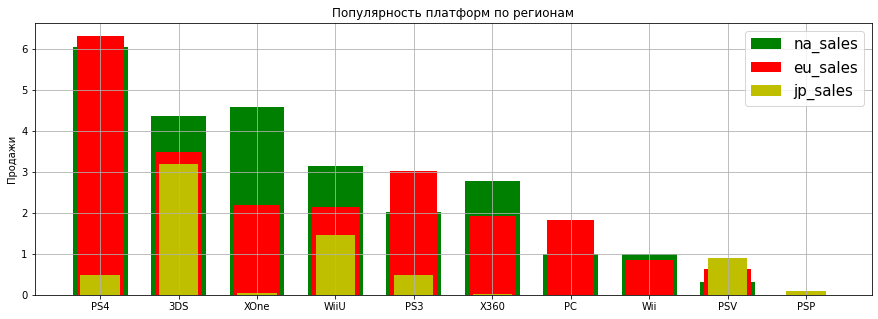

In [90]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

x = list(data_actual_years['platform'])
y1 = data_actual_years['na_sales']
y2 = data_actual_years['eu_sales']
y3 = data_actual_years['jp_sales']

#С помощью 3го парамметра делаем графики отличимыми друг от друга
ax.bar(x, y1, 0.7, label='na_sales', color = 'g')
ax.bar(x, y2, 0.6, label='eu_sales', color = 'r')
ax.bar(x, y3, 0.5, label='jp_sales', color = 'y')

ax.set_title('Популярность платформ по регионам')
ax.set_ylabel('Продажи')
ax.grid()
ax.legend(fontsize=15)

plt.show();

Вывод: 
- В США наиболее популярные платформы PS4, 3DS и XOne, причем разница между ними не большая, тогда как WiiU и PSV менее популярны на рынке США.
- В Европе наибольшей популярностью пользуются PS4 и 3DS с большим отрывом от остальных платформ.
- Рынок платформ японии значительно отличается, там приобладает 3DS платформы с большим отрывом от всех остальных.
- Из графика можно сделать вывод, что наиболее стабилен на всех рынках 3ds, т.к у него нет просадок ни в одном регионе
- С другой стороны, если не учитывать японский рынок, то PS4 значительно популярнее других платформ.

### Самые популярные жанры

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сделаем схожий с предидущим пунктом анализ, только в этот раз по жанрам

In [92]:
data_na_g = data_actual_years.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('Топ 5 жанров Северной Америки')
display(data_na_g)

data_eu_g = data_actual_years.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('Топ 5 жанров Европы')
display(data_eu_g)
 
data_jp_g = data_actual_years.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('Топ 5 жанров Японии')
display(data_jp_g)

Топ 5 жанров Северной Америки


,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


Топ 5 жанров Европы


,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


Топ 5 жанров Японии


,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


Вывод: 
- В США и Европе совпадают первые 2 места - это Action и Shooter. Также наименее популярным жанров в США и Европе является Platform.
- В Японии топ жанров сильно отличается от США и Европы. В японии с большим отрывом первое место занимает Role_Playing, 2 место Action, а 3-5 имеют практически одинаковую популярность
- Японский рынок имеет множество нюансов и отличий от других рынков, это может быть связоно с менталитетом данного региона.

### Влияние рейтинга ESRB на продажи

 Пропуски в рейтинге ESRB заменим на аббревиатуру ND - не определен.

In [95]:
data_actual_years['rating'] = data_actual_years['rating'].fillna(value='ND')

In [96]:
display(data_actual_years.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5))

display(data_actual_years.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5))

display(data_actual_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5))

,rating,na_sales
2,M,96.42
3,ND,64.72
0,E,50.74
4,T,38.95
1,E10+,33.23


,rating,eu_sales
2,M,93.44
3,ND,58.95
0,E,58.06
4,T,34.07
1,E10+,26.16


,rating,jp_sales
3,ND,56.90
4,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


Вывод:
- 
- В Европе и США наибольшее продаж в возрастном рейтинге М (от 17 лет), в сравнении в Японии М рейтинг лишь на 3 месте, это может свидетельствовать о контингенте покупателей игр в Японии
- Игры для всех возраство имеют высокие продажи на всех рынках
- Игры для подростков имеют среднюю высокую популярность на всех рынках
- Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Поэтому в Японии так популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и не получавшие рейтинга, но популярные на своей родине.
- Также в Европе и США кол-во неоценненых игр велико, что может обозначать, что и на этих рынках могут быть популярны игры не из США, Мексики или Канады.

Общий вывод:
-
Основная информация в данном разделе была о сравнении пользователей из разных рынков, мы выяснили, что рынок европы и США схожи, тогда как рынок Японии сильно отличается по многим категориям. 
Схожесть Европейских и Американских пользователей:
- Топ платформ очень схожи, лишь с небольшими отличиями
- Самые популярные жанры такжи схожи - Action, Shooter, Sports, Role-Playing
- Наибольшие продажи идут в категории М (от 17 лет), затем идет рейтинг Е(для всех)
Отличительные черты японского пользователя:
- Местная платформа леирует над остальными - 3DS
- Самый популярный жанр - Role-Playing с большим отрывом, затем идет Action
- Самые популярные рейтинги E (для всех) и T (13-19 лет)

## Проверка гипотез

### 1  Гипотеза 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

h0 - средние пользовательские рейтинги не отличаются
h1 - средние пользовательские рейтинги отличаются
альфа - 5% (Уровень значимости) == (вероятность верного анализа 95%)

In [99]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    data_actual_years[(data_actual_years.platform == "XOne") & (data_actual_years.user_score.notna())]['user_score'], 
    data_actual_years[(data_actual_years.platform == "PC") & (data_actual_years.user_score.notna())]['user_score']
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Вывод: Не удалось отвергнуть нулевую гипотезу, соответственно средний пользовательский рейтинг у PC и XOne с большой веростностью равны.

### 2 Гипотеза

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

ho: Средние пользовательские рейтинги жанров Action и Sports одинаковые
h1: Средние пользовательские рейтинга жанров Acrion и Sports не равны
альфа = 5% (Уровень значимости) == (вероятность верного анализа 95%)

In [100]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    data_actual_years[(data_actual_years.genre == "Action") & (data_actual_years.user_score.notna())]['user_score'], 
    data_actual_years[(data_actual_years.genre == "Sports") & (data_actual_years.user_score.notna())]['user_score']
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод: 
- 5.1 гипотеза о равенстве средних 2 генеральных совокупностей, был исользован ttest, вероятность допущения ошибки 5%
- 5.2 двухстороняя гипотеза, был исользован ttest, вероятность допущения ошибки 5%


-На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Вывод по всему проекту

```
Проект состоял из 5 больших блоков, о каждом из блоков сделаю общие выводы:
Первый блок состоял из изучения общей информации о данном нам датасте
- Мы изучили способ хранения данных
- Были изучены значения всех столбцов и их типы данных
- Полученная информация далее сильно помогала для обработки данных
Второй блок состоял из подготовки данных для последующего анализа
- были замененв названия столбцов
- обработаны пропуски в данных
- также посчитаны суммарные продажи во всех регионах
Третий этап состоял из исследования данных
- Был выбран актуальный период для прогноза на 2017 год и это промежуток между 2011 и 2016 годами
- Найдены 3 самые перспективные платформы - PS4, XOne и WiiU
- На продажи PS4 и XOne слабо влияет мнение критиков, тогда как на остальные платформы их оценка имеет сильное влияние. WiiU единственная из платформ, которая имеет слабое положительное влияние от оценки пользователей.
- Самые продоваемые жанры: Action, Shooter, Role_Playing. Точную оценку прибыльности без дополнитульных данных дать невозмоно.
Четвертый этап был посвящен изучению пользователей различных рынков
- Главный вывод, что портреты пользователей Америки и Европы схожи, тогда как портрет японсокго пользователя сильно отличается и на это нужно обратить внимание.
Схожесть Европейских и Американских пользователей:
- Топ платформ очень схожи, лишь с небольшими отличиями
- Самые популярные жанры такжи схожи - Action, Shooter, Sports, Role-Playing
- Наибольшие продажи идут в категории М (от 17 лет), затем идет рейтинг Е(для всех) 
Отличительные черты японского пользователя:
- Местная платформа леирует над остальными - 3DS
- Самый популярный жанр - Role-Playing с большим отрывом, затем идет Action
- Самые популярные рейтинги E (для всех) и T (13-19 лет)

Пятый и заключительный блок был посвящен проверки двух гипотиз:
- Cредние пользовательские рейтинги платформ Xbox One и PC не различаются
- Cредние пользовательские рейтинги жанров Action и Sports различаются
```